<h1>Deep learning with tensorflow 2.0 and keras regression, ConvNets, GANs, RNN</h1>

<h2>Mnist dataset</h2>

<b>import necessary libraries</b>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models,optimizers

In [3]:
EPOCHS=5
BATCH_SIZE=128
VERBOSE=1
OPTIMIZER=tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.95

IMG_ROWS,IMG_COLS=28,28
INPUT_SHAPE=(IMG_ROWS,IMG_COLS,1)
# NB_CLASSES is number of outputs
NB_CLASSES=10

<p style="color:blue"><b>Let's now define</b></p>
<p><b>LeNet</b></p>

<p>Elements:</br>
<ul>
    <li>Convolution</li>
    <li>Max-pooling</li>
    <li>Convolution</li>
    <li>Max-pooling</li>
    <li>Flatten</li>
    <li>Dense</li>
    <li>Dense</li>
</ul>
</p>

In [4]:
def build(input_shape,classes):
    model=models.Sequential()
    #   convolution->relu->pool  
    model.add(layers.Convolution2D(20,(5,5),activation='relu',input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    #   convolution->relu->pool  
    model.add(layers.Convolution2D(50,(5,5),activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    #   flater->relu 
    model.add(layers.Flatten())
    model.add(layers.Dense(500,activation='relu'))
    #    softmax classifier
    model.add(layers.Dense(classes,activation='softmax'))
    model.summary()
    return model

<p style="color:blue"><b>load dataset</b></p>

In [5]:
(X_train,Y_train),(X_test,Y_test)=datasets.mnist.load_data()


In [56]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_train=X_train.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [9]:
y_train=tf.keras.utils.to_categorical(Y_train,NB_CLASSES)
y_test=tf.keras.utils.to_categorical(Y_test,NB_CLASSES)

In [10]:
model=build(input_shape=INPUT_SHAPE,classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy",optimizer=OPTIMIZER,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               400500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [11]:
callbacks=[
#     tf.keras.callbacks.TensorBoard(logdir='./logs')
    tf.keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=1)
]

In [12]:
history=model.fit(
    X_train,y_train,
    batch_size=BATCH_SIZE, epochs=20,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=callbacks
)

Epoch 1/20
 1/24 [>.............................] - ETA: 0s - loss: 2.3054 - accuracy: 0.0859WARNING:tensorflow:From /home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
24/24 [==============================] - 8s 323ms/step - loss: 1.1514 - accuracy: 0.7067 - val_loss: 0.4833 - val_accuracy: 0.8548
Epoch 2/20
24/24 [==============================] - 7s 307ms/step - loss: 0.3237 - accuracy: 0.9080 - val_loss: 0.2756 - val_accuracy: 0.9154
Epoch 3/20
24/24 [==============================] - 7s 285ms/step - loss: 0.2134 - accuracy: 0.9410 - val_loss: 0.2206 - val_accuracy: 0.9328
Epoch 4/20
24/24 [==============================] - 7s 272ms/step - loss: 0.1581 - accuracy: 0.9547 - val_loss: 0.1897 - val_accuracy: 0.9434
Epoch 5/20
24/24 [=====================

In [13]:
score=model.evaluate(X_test,y_test,verbose=VERBOSE)

313/313 [==============================] - 2s 5ms/step - loss: 0.0951 - accuracy: 0.9750


In [14]:
print("Test Score: ",score[0])
print("Test Accuracy: ",score[1])

Test Score:  0.09505554288625717
Test Accuracy:  0.9750000238418579


In [15]:
score

[0.09505554288625717, 0.9750000238418579]

In [18]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10889), started 0:08:04 ago. (Use '!kill 10889' to kill it.)

<p style="color:blue"><b>Feature map of each layer</b></p>

In [16]:
X_train.shape

(60000, 28, 28, 1)

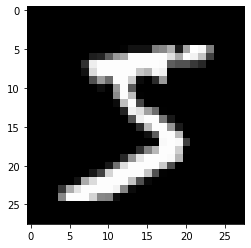

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

In [18]:
test=X_train[0]

<p>first layer feature map</p>

In [19]:
first_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)

In [20]:
import numpy as np
from keras.preprocessing.image import img_to_array
img = img_to_array(test)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)


In [21]:
img.shape

(1, 28, 28, 1)

In [22]:
feature_maps = first_feature_map.predict(img)

In [28]:
feature_maps.shape

(1, 24, 24, 20)

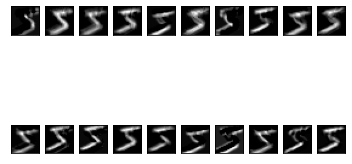

In [24]:
# square = 5
rows=2
columns=10
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

output of 2nd layer

In [30]:
model.inputs

[<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>]

In [25]:
second_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

In [26]:
feature_maps.shape

(1, 24, 24, 20)

In [31]:
feature_maps_2=second_feature_map.predict(img)

In [32]:
feature_maps_2.shape

(1, 12, 12, 20)

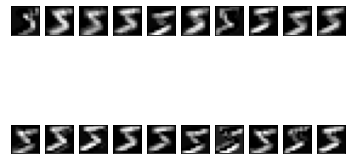

In [33]:
rows=2
columns=10
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps_2[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

<p>output of 3rd layer</p>

In [34]:
third_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)

In [38]:
feature_maps_3=third_feature_map.predict(img)

In [39]:
feature_maps_3.shape

(1, 8, 8, 50)

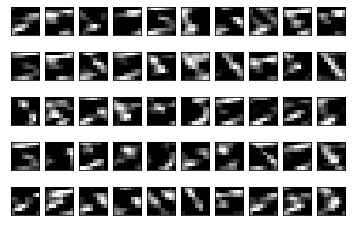

In [41]:
rows=5
columns=10
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps_3[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

<p>output of the 4th layer</p>

In [42]:
fourth_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)

In [43]:
feature_maps_4=fourth_feature_map.predict(img)

In [44]:
feature_maps_4.shape

(1, 4, 4, 50)

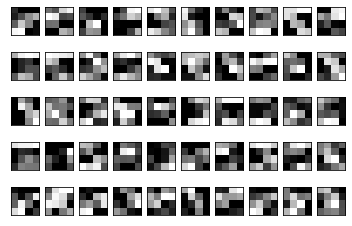

In [45]:
rows=5
columns=10
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps_4[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

<h2>CIFAR-10 dataset</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,optimizers

In [2]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
INPUT_SHAPE=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)

In [3]:
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
x_train=X_train.astype('float32')
x_test=X_test.astype('float32')

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
x_train=x_train.reshape((50000,32,32,3))
x_test=x_test.reshape((10000,32,32,3))

In [10]:
y_train=tf.keras.utils.to_categorical(Y_train,CLASSES)
y_test=tf.keras.utils.to_categorical(Y_test,CLASSES)

In [11]:
x_train.shape

(50000, 32, 32, 3)

<p>let's create convnet</p>
<b>Characteristics:</b>
<ol>
        <li>Convolution 2D</li>
        <li>Max pooling</li>
        <li>Dropout</li>
        <li>Flatten</li>
        <li>Dense</li>
        <li>Dropout</li>
        <li>Dense</li>
</ol>

In [40]:
def build(input_shape,classes):
    model=models.Sequential()
    model.add(layers.Convolution2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes,activation='softmax'))
    model.summary()
    return model

In [13]:
model=build(INPUT_SHAPE,CLASSES)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [14]:
callbacks = [
# Write TensorBoard logs to './logs' directory
tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=BATCH_SIZE,epochs=EPOCHS, validation_split=VALIDATION_SPLIT,verbose=VERBOSE, callbacks=callbacks)

Epoch 1/20
  1/313 [..............................] - ETA: 0s - loss: 97.7905 - accuracy: 0.1250WARNING:tensorflow:From /home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
313/313 [==============================] - 33s 107ms/step - loss: 11.9728 - accuracy: 0.2184 - val_loss: 1.8418 - val_accuracy: 0.3341
Epoch 2/20
313/313 [==============================] - 31s 100ms/step - loss: 1.8245 - accuracy: 0.3742 - val_loss: 1.7032 - val_accuracy: 0.4098
Epoch 3/20
313/313 [==============================] - 31s 99ms/step - loss: 1.7170 - accuracy: 0.4217 - val_loss: 1.5817 - val_accuracy: 0.4428
Epoch 4/20
313/313 [==============================] - 32s 101ms/step - loss: 1.6219 - accuracy: 0.4587 - val_loss: 1.5233 - val_accuracy: 0.4492
Epoch 5/20
313/313 [====

In [17]:
scores=model.evaluate(x_test,y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)

79/79 [==============================] - 2s 19ms/step - loss: 1.4677 - accuracy: 0.5635


<p style="color:blue"><b>let's visualize each layer output</b></p>

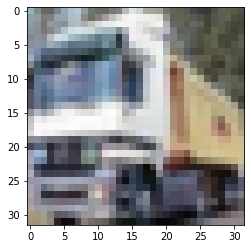

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1],cmap='gray')

In [19]:
test=X_train[1]

In [20]:
import numpy as np
from keras.preprocessing.image import img_to_array
img = img_to_array(test)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)


In [21]:
img.shape

(1, 32, 32, 3)

first feature map

In [22]:
first_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)

In [23]:
feature_map_1=first_feature_map.predict(img)

In [24]:
feature_map_1.shape

(1, 30, 30, 32)

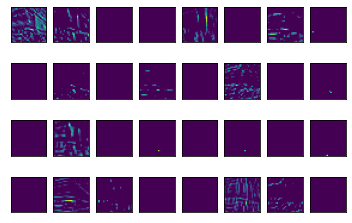

In [25]:
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_1[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

second feature map

In [26]:
second_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_map_2=second_feature_map.predict(img)


In [27]:
feature_map_2.shape

(1, 15, 15, 32)

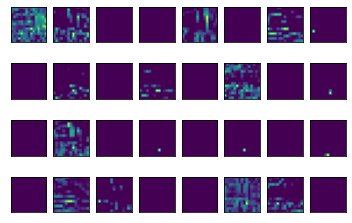

In [28]:
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_2[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

<p>output of 3rd layer[dropout layer]</p>

In [30]:
third_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
feature_map_3=third_feature_map.predict(img)


In [31]:
feature_map_3.shape

(1, 15, 15, 32)

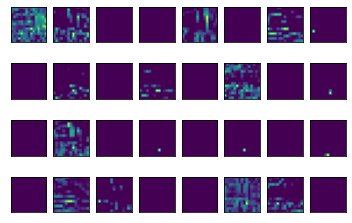

In [32]:
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_3[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

<p style="color:blue"><b>let's improve the model with deeper network</b></p>

<p><b>
    <ol>
    <li>1st module:(CONV+CONV+MAXPOOL+DROPOUT)</li>
    <li>2nd module:(CONV+CONV+MAXPOOL+DROPOUT)</li>
    <li>3rd module:(CONV+CONV+MAXPOOL+DROPOUT)</li>    
    </ol>
</b></p>

In [3]:
def build(input_shape,classes):
    model=models.Sequential()
    #     1st block
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    #     2nd block
    model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    #     3rd block          
    model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))
    #     4th block
    model.add(layers.Flatten())
    model.add(layers.Dense(classes, activation='softmax'))
    model.summary()
    return model

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,regularizers,optimizers

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [6]:
EPOCHS=50
NUM_CLASSES=10

In [7]:
def load_data():
    (x_train, y_train),(x_test,y_test)=datasets.cifar10.load_data()
    x_train=x_train.astype('float32')
    x_test=x_test.astype('float32')
    #   normalization
    mean=np.mean(x_train,axis=(0,1,2,3))
    std=np.std(x_train,axis=(0,1,2,3))
    x_train=(x_train-mean)/(std+1e-7)
    x_test=(x_test-mean)/(std+1e-7)
    #   
    y_train=tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test=tf.keras.utils.to_categorical(y_test,NUM_CLASSES)
    
    return x_train,y_train,x_test,y_test
    

In [8]:
(x_train,y_train,x_test,y_test)=load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
input_shape=x_train.shape[1:]
input_shape

(32, 32, 3)

In [11]:
model=build(input_shape,NUM_CLASSES)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

train

In [ ]:
batch_size=64
model.fit(x_train, y_train, batch_size=batch_size,epochs=EPOCHS, validation_data=(x_test,y_test))

Epoch 1/50
782/782 [==============================] - 232s 296ms/step - loss: 1.7282 - accuracy: 0.4800 - val_loss: 1.2028 - val_accuracy: 0.6200
Epoch 2/50
782/782 [==============================] - 229s 293ms/step - loss: 1.0508 - accuracy: 0.6594 - val_loss: 1.0470 - val_accuracy: 0.6655
Epoch 3/50
782/782 [==============================] - 230s 294ms/step - loss: 0.8513 - accuracy: 0.7145 - val_loss: 0.9227 - val_accuracy: 0.7027
Epoch 4/50
782/782 [==============================] - 230s 294ms/step - loss: 0.7308 - accuracy: 0.7524 - val_loss: 1.0289 - val_accuracy: 0.7150
Epoch 5/50
782/782 [==============================] - 230s 294ms/step - loss: 0.6499 - accuracy: 0.7780 - val_loss: 0.6484 - val_accuracy: 0.7796
Epoch 6/50
782/782 [==============================] - 233s 298ms/step - loss: 0.5939 - accuracy: 0.7979 - val_loss: 0.6404 - val_accuracy: 0.7843
Epoch 7/50
782/782 [==============================] - 229s 293ms/step - loss: 0.5443 - accuracy: 0.8143 - val_loss: 0.5656 -

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)

<b>improving cifar-10 performance using data augmentation</b>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,regularizers,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [2]:
EPOCHS=50
NUM_CLASSES=10

In [3]:
def load_data():
    (x_train, y_train),(x_test,y_test)=datasets.cifar10.load_data()
    x_train=x_train.astype('float32')
    x_test=x_test.astype('float32')
    #   normalization
    mean=np.mean(x_train,axis=(0,1,2,3))
    std=np.std(x_train,axis=(0,1,2,3))
    x_train=(x_train-mean)/(std+1e-7)
    x_test=(x_test-mean)/(std+1e-7)
    #   
    y_train=tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test=tf.keras.utils.to_categorical(y_test,NUM_CLASSES)
    
    return x_train,y_train,x_test,y_test
    

In [4]:
(x_train,y_train,x_test,y_test)=load_data()

In [5]:
input_shape=x_train.shape[1:]
input_shape

(32, 32, 3)

<p>data augmentation</p>

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [8]:
datagen.fit(x_train)

In [9]:
batch_size=64

In [10]:
def build(input_shape,classes):
    model=models.Sequential()
    #     1st block
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    #     2nd block
    model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    #     3rd block          
    model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))
    #     4th block
    model.add(layers.Flatten())
    model.add(layers.Dense(classes, activation='softmax'))
    model.summary()
    return model

In [11]:
model=build(input_shape,NUM_CLASSES)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [15]:
model.fit_generator(
    datagen.flow(x_train,y_train,batch_size=batch_size),
    epochs=20,
    verbose=1,validation_data=(x_test,y_test)
)

Epoch 1/20
782/782 [==============================] - 301s 385ms/step - loss: 2.1119 - accuracy: 0.3584 - val_loss: 1.7003 - val_accuracy: 0.4667
Epoch 2/20
782/782 [==============================] - 284s 364ms/step - loss: 1.5463 - accuracy: 0.4943 - val_loss: 1.4875 - val_accuracy: 0.5373
Epoch 3/20
782/782 [==============================] - 279s 357ms/step - loss: 1.3528 - accuracy: 0.5500 - val_loss: 1.1739 - val_accuracy: 0.6233
Epoch 4/20
782/782 [==============================] - 279s 357ms/step - loss: 1.2000 - accuracy: 0.5906 - val_loss: 1.1943 - val_accuracy: 0.6161
Epoch 5/20
782/782 [==============================] - 253s 324ms/step - loss: 1.0980 - accuracy: 0.6227 - val_loss: 0.9212 - val_accuracy: 0.6863
Epoch 6/20
782/782 [==============================] - 330s 422ms/step - loss: 1.0180 - accuracy: 0.6470 - val_loss: 0.8932 - val_accuracy: 0.6981
Epoch 7/20
782/782 [==============================] - 256s 327ms/step - loss: 0.9590 - accuracy: 0.6698 - val_loss: 0.9440 -

save model

In [16]:
model_json=model.to_json()
with open('cifar10_architecture.json','w') as json_file:
    json_file.write(model_json)
    

save weights

In [17]:
model.save_weights('cifar10_weights.h5')

evaluation

In [18]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 9s 112ms/step - loss: 0.6652 - accuracy: 0.7850


<b>predicting after loading saved model</b>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import scipy.misc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

load model

In [3]:
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'


In [4]:
model = model_from_json(open(model_architecture).read())


load weights

In [5]:
model.load_weights(model_weights)

image for testing

In [6]:
img_names = ['cat.jpg', 'dog.jpg']

In [7]:
from skimage.transform import resize
from skimage.io import imread,imshow



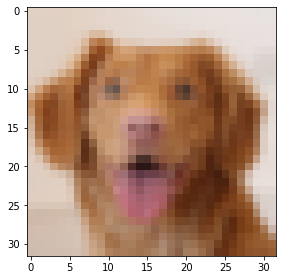

In [8]:
i=resize(imread(img_names[1]),(32,32))
imshow(i)

In [9]:
imgs = [resize(imread(img_name),(32, 32)).astype('float32') for img_name in img_names]

In [10]:
# imgs = [np.transpose(resize(imread(img_name),(32, 32)), (2, 0, 1)).astype('float32') for img_name in img_names]

In [11]:
# imgs = np.array(imgs) / 255
imgs = np.array(imgs) 

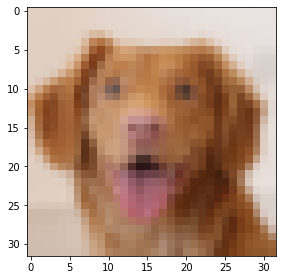

In [12]:
imshow(imgs[1])

In [13]:
imgs.shape

(2, 32, 32, 3)

compile model

In [14]:
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,metrics=['accuracy'])

prediction

In [15]:
predictions=model.predict(imgs)

In [16]:
predictions

array([[0.14250991, 0.00600901, 0.10742889, 0.28544402, 0.14141127,
        0.09266967, 0.1269526 , 0.02156763, 0.06817093, 0.00783608],
       [0.0281092 , 0.00314926, 0.06534865, 0.2609878 , 0.39249405,
        0.05421273, 0.13204806, 0.0222234 , 0.03546242, 0.00596441]],
      dtype=float32)

In [17]:
np.argmax(predictions, axis=1)

array([3, 4])

<p style="color:red"><b>here the dog is classified as deer</b></p>

<p style="color:blue"><b>layer outputs</b></p>

first reshape the single image so that the model knows it's a sample

In [19]:
import numpy as np
from keras.preprocessing.image import img_to_array
# img = img_to_array(test)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(imgs[1], axis=0)


In [20]:
img.shape

(1, 32, 32, 3)

<b>1st block</b>

1st layer

In [21]:
first_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_map_1=first_feature_map.predict(img)

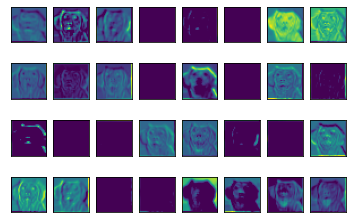

In [23]:
import matplotlib.pyplot as plt
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_1[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

2nd layer

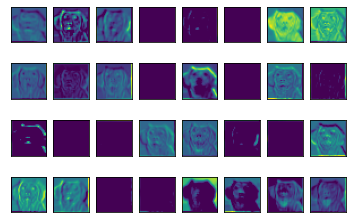

In [25]:
second_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_map_2=second_feature_map.predict(img)
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_2[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

3rd layer

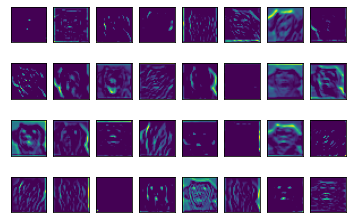

In [27]:
third_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
feature_map_3=third_feature_map.predict(img)
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_3[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

4th layer

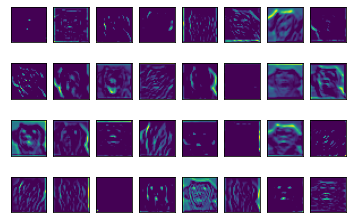

In [28]:
fourth_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
feature_map_4=fourth_feature_map.predict(img)
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_4[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

5th layer

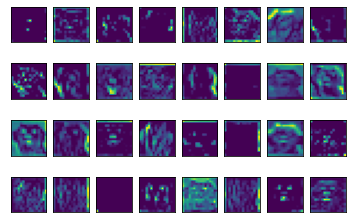

In [29]:
fifth_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[4].output)
feature_map_5=fifth_feature_map.predict(img)
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_5[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

6th layer

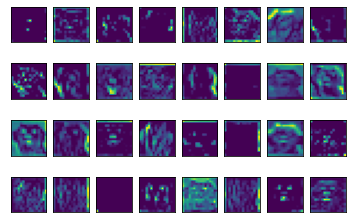

In [30]:
sixth_feature_map = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[5].output)
feature_map_6=sixth_feature_map.predict(img)
rows=4
columns=8
ix = 1
for _ in range(rows):
	for _ in range(columns):
		# specify subplot and turn of axis
		ax = plt.subplot(rows, columns, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map_6[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

<p style="color:blue"><b>building vgg16 from scratch</b></p>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [31]:
def vgg16(weights_path=None):
    model = models.Sequential()
    
    model.add(layers.ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(layers.Convolution2D(64,(3,3),activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(4096,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000,activation='softmax'))
    
    if weights_path:
        model.load_weights(weights_path)
    return model
    

In [25]:
from skimage.transform import resize
from skimage.io import imread,imshow
import numpy as np

img=resize(imread('dog.jpg').astype('float32'),(224,224))

In [26]:
img.shape

(224, 224, 3)

In [27]:
type(img)

numpy.ndarray

In [28]:
img=np.expand_dims(img,axis=0)

In [29]:
img.shape

(1, 224, 224, 3)

<b>as we have used pretrained weights, we do not need to use fit_generator</b>

In [32]:
model=vgg16("vgg16_weights_tf_dim_ordering_tf_kernels.h5")

In [33]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')


In [35]:
out = model.predict(img)

In [36]:
out

array([[7.51974198e-07, 6.93020397e-08, 1.56667657e-08, 3.75520166e-08,
        1.57962070e-08, 1.22109270e-06, 3.59709809e-08, 1.82656208e-07,
        7.59014142e-07, 2.87784054e-08, 9.02648289e-10, 5.13929344e-09,
        2.67123017e-08, 2.75588761e-08, 2.45944491e-08, 5.08637976e-09,
        5.34100124e-08, 8.71947279e-08, 4.05544220e-08, 4.39446213e-09,
        5.46491963e-09, 1.46429500e-07, 1.23574466e-06, 7.61660476e-06,
        2.88265596e-06, 1.01408002e-08, 3.56240619e-08, 1.19932324e-07,
        1.54578828e-07, 1.68337877e-07, 1.31946507e-08, 3.16531654e-08,
        1.07015889e-08, 2.69073719e-09, 2.18050662e-08, 1.21925172e-08,
        5.67569813e-08, 8.76712534e-08, 2.63882470e-07, 5.79778714e-07,
        8.99416577e-08, 6.14699118e-08, 1.63670464e-07, 2.15680629e-07,
        3.39318937e-08, 8.28268032e-09, 2.81672641e-07, 4.33159428e-08,
        2.07895710e-07, 2.98822411e-09, 4.45400623e-08, 2.82968529e-07,
        1.36521603e-08, 4.37999370e-09, 2.63133559e-09, 2.218145

In [37]:
print(np.argmax(out))

205


<b style="color:red">classified as flat coated retriever(205)</b>